In [1]:
import source as sc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

[254.59724414 254.49393079 254.54431472]
<class 'numpy.ndarray'>


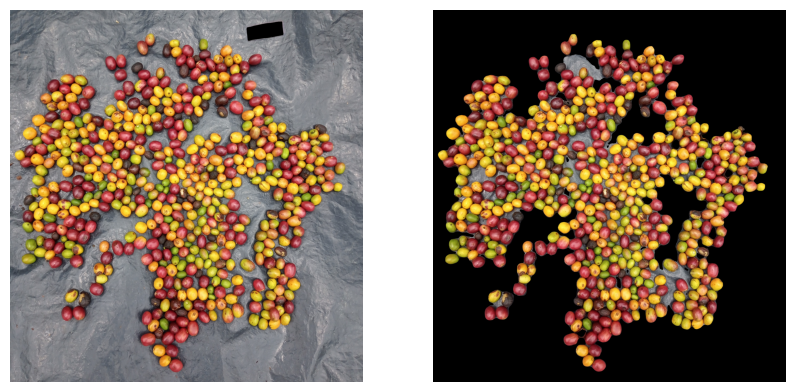

In [8]:
path="imagenes_cafe\cafe.jpg"

img = sc.read_img(path)
img_normal,ref_white,mean,sample = sc.Normal(img,white_limit=240)

print(mean)
print(type(img_normal))

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(ref_white)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_normal)
plt.axis('off')

plt.show()

In [9]:
Lab_unfold = sc.RGB2Lab(img_normal.reshape(-1,3))
Lch_unfold = sc.Lab2Lch(Lab_unfold)

Lab = Lab_unfold.reshape(img_normal.shape)
Lch = Lch_unfold.reshape(img_normal.shape)

#plt.figure(figsize=(15,10))

#plt.subplot(1,3,1)
#plt.imshow(Lab[:,:,0])
#plt.axis('off')

#plt.subplot(1,3,2)
#plt.imshow(Lab[:,:,1])
#plt.axis('off')

#plt.subplot(1,3,3)
#plt.imshow(Lab[:,:,2])
#plt.axis('off')

#plt.show()


#plt.figure(figsize=(15,10))

#plt.subplot(1,3,1)
#plt.imshow(Lch[:,:,0])
#plt.axis('off')

#plt.subplot(1,3,2)
#plt.imshow(Lch[:,:,1])
#plt.axis('off')

#plt.subplot(1,3,3)
#plt.imshow(Lch[:,:,2])
#plt.axis('off')

#plt.show()

In [10]:

# MASCARA PARA VERDE
MaskL_Verde,img_maskL_Verde = sc.MaskLab(Lab,img_normal,"L",(50,100))
Maska_verde,img_maska_Verde = sc.MaskLab(MaskL_Verde,img_maskL_Verde,"a",(-50,-10))

# MASCARA PARA PINTON
MaskL_Pinton,img_maskL_Pinton = sc.MaskLab(Lab,img_normal,"L",(61,99.9))
Maska_Pinton,img_maska_Pinton = sc.MaskLab(MaskL_Pinton,img_maskL_Pinton,"a",(-9,25))

# MASCARA PARA MADURO
MaskL_Maduro,img_maskL_Maduro = sc.MaskLab(Lab,img_normal,"L",(20,99))
Maska_Maduro,img_maska_Maduro = sc.MaskLab(MaskL_Maduro,img_maskL_Maduro,"a",(15,100))

# MASCARA PARA SOBREMADURO
MaskL_SMaduro,img_maskL_SMaduro = sc.MaskLab(Lab,img_normal,"L",(0,60))
Maska_SMaduro,img_maska_SMaudro = sc.MaskLab(MaskL_SMaduro,img_maskL_SMaduro,"a",(-10,15))

# MASCARA PARA CPS BUENO
#MaskL_CPSB,img_maskL_CPSB = sc.MaskLab(Lab,img_normal,"L",(50,85))
#Maska_CPSB,img_maska_CPSB = sc.MaskLab(MaskL_CPSB,img_maskL_CPSB,"a",(0,20))


# MASCARA PARA CPS MALO
#MaskL_CPSM,img_maskL_CPSM = sc.MaskLab(Lab,img_normal,"L",(5,50))
#Maska_CPSM,img_maska_CPSM = sc.MaskLab(MaskL_CPSM,img_maskL_CPSM,"a",(0,50))


In [5]:
#plt.subplot(2,2,1)
#plt.title(str((Maska_CPSB[:,:,0][Maska_CPSB[:,:,0]!=0].shape[0]/sample)*100))
#plt.imshow(img_maska_CPSB)
#plt.axis('off')

#plt.subplot(2,2,2)
#plt.title(str((Maska_CPSM[:,:,0][Maska_CPSM[:,:,0]!=0].shape[0]/sample)*100))
#plt.imshow(img_maska_CPSM)
#plt.axis('off')

#plt.show()

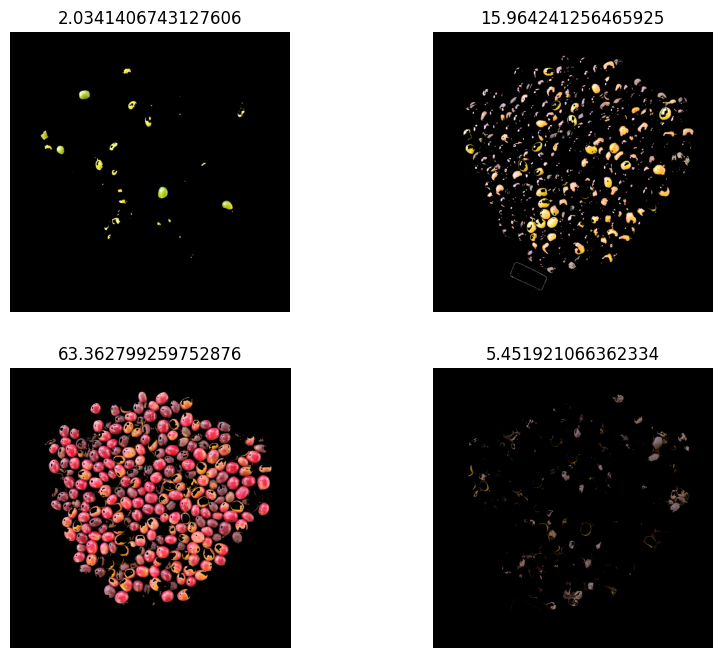

In [6]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title(str((Maska_verde[:,:,0][Maska_verde[:,:,0]!=0].shape[0]/sample)*100))
plt.imshow(img_maska_Verde)
plt.axis('off')

plt.subplot(2,2,2)
plt.title(str((Maska_Pinton[:,:,0][Maska_Pinton[:,:,0]!=0].shape[0]/sample)*100))
plt.imshow(img_maska_Pinton)
plt.axis('off')

plt.subplot(2,2,3)
plt.title(str((Maska_Maduro[:,:,0][Maska_Maduro[:,:,0]!=0].shape[0]/sample)*100))
plt.imshow(img_maska_Maduro)
plt.axis('off')

plt.subplot(2,2,4)
plt.title(str((Maska_SMaduro[:,:,0][Maska_SMaduro[:,:,0]!=0].shape[0]/sample)*100))
plt.imshow(img_maska_SMaudro)
plt.axis('off')






plt.show()

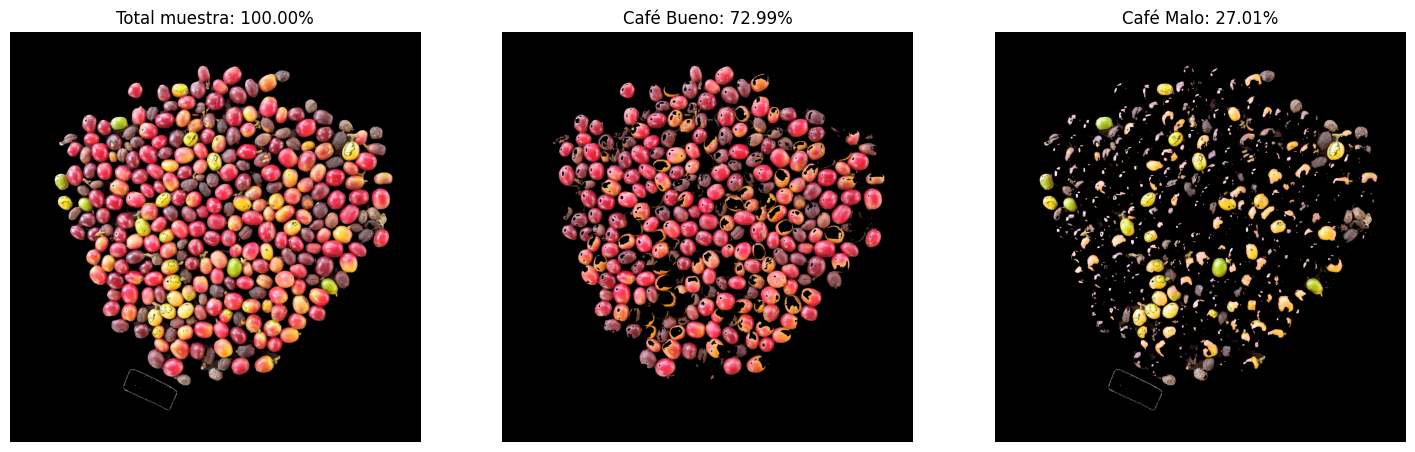

In [7]:
img_malo = np.zeros_like(Maska_verde.reshape(-1,3))
img_bueno = np.zeros_like(Maska_Pinton.reshape(-1,3))
img_suma = np.zeros_like(Maska_Maduro.reshape(-1,3))


porcentaje_Verde = (Maska_verde[:,:,0][Maska_verde[:,:,0]!=0].shape[0]/sample)*100
porcentaje_Pinton = (Maska_Pinton[:,:,0][Maska_Pinton[:,:,0]!=0].shape[0]/sample)*100
porcentaje_Maduro = (Maska_Maduro[:,:,0][Maska_Maduro[:,:,0]!=0].shape[0]/sample)*100
porcentaje_SMaduro = (Maska_SMaduro[:,:,0][Maska_SMaduro[:,:,0]!=0].shape[0]/sample)*100

# Suma de las máscaras
idx_verde = np.where(img_maska_Verde.reshape(-1,3)!=0)[0]
idx_Pinton = np.where(img_maska_Pinton.reshape(-1,3)!=0)[0]
idx_Maduro = np.where(Maska_Maduro.reshape(-1,3)!=0)[0]
idx_SMaduro = np.where(Maska_SMaduro.reshape(-1,3)!=0)[0]

#SUMA TOTAL
img_suma[idx_verde] = img_maska_Verde.reshape(-1,3)[idx_verde]
img_suma[idx_Pinton] = img_maska_Pinton.reshape(-1,3)[idx_Pinton]
img_suma[idx_Maduro] = img_maska_Maduro.reshape(-1,3)[idx_Maduro]
img_suma[idx_SMaduro] = img_maska_SMaudro.reshape(-1,3)[idx_SMaduro]

#SUMA CAFE BUENO
img_bueno[idx_Maduro] = img_maska_Maduro.reshape(-1,3)[idx_Maduro]

#SUMA CAFE MALO
img_malo[idx_Pinton] = img_maska_Pinton.reshape(-1,3)[idx_Pinton]
img_malo[idx_verde] = img_maska_Verde.reshape(-1,3)[idx_verde]
img_malo[idx_SMaduro] = img_maska_SMaudro.reshape(-1,3)[idx_SMaduro]

#suma de los porcentajes
porcentaje_suma = porcentaje_SMaduro + porcentaje_Maduro + porcentaje_Verde + porcentaje_Pinton
porcentaje_bueno = porcentaje_Maduro 
porcentaje_malo = porcentaje_Pinton + porcentaje_Verde + porcentaje_SMaduro


plt.figure(figsize=(18, 15))

plt.subplot(1, 3, 1)
plt.title(f"Total muestra: {(porcentaje_suma/porcentaje_suma)*100:.2f}%")
plt.imshow(img_suma.reshape(img_normal.shape))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Café Bueno: {(porcentaje_bueno/porcentaje_suma)*100:.2f}%")
plt.imshow(img_bueno.reshape(img_normal.shape))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Café Malo: {(porcentaje_malo/porcentaje_suma)*100:.2f}%")
plt.imshow(img_malo.reshape(img_normal.shape))
plt.axis('off')

plt.show()